# Projet Modélisations Mathématiques : La cryptographie El Gamal

+ Participants : LEFEBVRE Léo MACHARD Baptiste et ROMERO Mathias
+ Professeur durant les TDs : M.Dien

# Sommaire

- [ ] [I. Introduction](#intro)
- [ ] [II. Génération d'un nombre premier](#premier)
 - [ ] [1) Le test qui n'est pas premier](#paspremier)
 - [ ] [2) Le test de Miller-Rabin](#miller)
   - [ ] [a) Exemple](#exemple)
 - [ ] [3) Génération d'un nombre premier](#generation)
- [ ] [II. Racine primitive modulo p d'un nombre premier](#racine)
 - [ ] [1) Definition d'une racine primitive modulo p d'un nombre premier](#definition)
 - [ ] [2) Définition d'un groupe cyclique](#cyclique)
 - [ ] [3) Generateurs d'un groupe cyclique](#generateur)
   - [ ] [a) Exemple de groupe Z/5Z +](#additif)
   - [ ] [b) Exemple de groupe Z/5Z *](#multiplicatif)
   - [ ] [c) Exemple de graphe Z/42Z](#graphe)
 - [ ] [4) Différente version du programme](#version)
 - [ ] [5) Fonctionnement du programme](#fonctionnement_racine)
 - [ ] [6) Implementation personnelle de la fonction  euler_phi(n)](#implementation)
   - [ ] [a) Définition de la fonction](#definition_euler)
   - [ ] [b) Implementation de la fonction](#implementation_euler)
- [ ] [IV. Transformation d'un message par l'utilisation de grands nombres premiers](#fonctionnement)
 - [ ] [1) L'encryption](#encryption)
 - [ ] [2) La décryption](#decryption)
 - [ ] [3) Les messages textuels](#messages)

 

<a id="intro"></a>
## I. Qu'est-ce qu'El Gamal ?



Ce système de cryptage est un système inventé par Taher Gamal qui est un protocole de cryptographie asymétrique et construit à partir du problème du logarithme discret.
La cryptographie asymétrique est un domaine de la cryptographie dont il y a une distinction entre clé privée et clé publique.
Par exemple, on a Monsieur A et Monsieur B.  
+ Lorsque Monsieur A veut envoyer un message sécurisé à Monsieur B, Monsieur A doit demander à Monsieur B sa clé publique (clé de chiffrement).  
+ Monsieur A utilise cette clé publique pour chiffrer son message puis l'envoie à Monsieur B.  
+ Monsieur B utilise sa clé privée (clé de déchiffrement) pour obtenir le contenu du message.

Concernant le problème de logarithme discret, il est utilisé en cryptographie pour sa complexité de résolution. il notamment utilisé dans les systèmes bluetooth aujourd'hui mais a aussi été utilisé par la machine [enigma](https://fr.wikipedia.org/wiki/Enigma_(machine)).
Le principe est simple :
Nous utilisons un groupe cyclique multiplicatif de la forme $a^b[p]$ de façon à ce qu'à partir d'un nombre k d'incrémentation de b, les résultats se répètent à chaque fois. La complexité de ce logarithme réside donc dans le fait de retrouver la bonne puissance utilisée parmi un ensemble de résultats qui se répète. Le modulo ici est la partie la plus importante car c'est ce qui permet d'avoir un cycle est donc de rendre la recherche de b exponentiellement plus longue dès que la puissance recherchée deviens "grande".

<a id="premier"></a>
## II. Génération d'un nombre premier

Il est important d'avoir un nombre premier pour générer la clé de chiffrement (clé publique) dans le cryptosystème d'ElGamal.
Pour générer un nombre premier, il est nécessaire de tester si c'est bien un nombre premier. Pour tester ceci nous allons utiliser le test de Miller-Rabin qui permet de savoir si un nombre n'est **pas** premier avec une précision **k**

<a id="paspremier"></a>
### 1) Première fonction : le test qui n'est pas premier
Ce test de savoir s'il n'est pas premier est composé de deux paramètre le nombre n qu'on veut savoir s'il est pas premier et d'une variable aléatoire a.
Si n est inférieur à 3 ou pair, on ne continue pas le test.

Après, il faut trouver r et d tel que :  
$(r\cdot2)^d = n-1$  
Pour trouver d et r, on dit que $r=n-1$ et $d=0$.  
Après cela, r est divisé par 2 tant que le reste est égal à 0.  
À chaque division de r, d est incrémenté de 1.  
  
Lorsque r et d sont trouvés, une variable x sera égal à $(a^r)[n]$.  
Si ce x est égal à 1 ou à $n-1$, il est probable que n est premier.  
Si ce x est négatif, on redéfini x de cette façon : $(a^2)[n]$  
Et si ce x est égal à $n-1$, il est probable que n est premier.  
Sinon, n est forcément pas premier.  

In [2]:
#n -> Le nombre qu'on veut tester si il est pas premier
#a -> Le nombre générer aléatoirement entre 2 et n-2
def isNotPrime(n, a):
    if(n<3):
        print("n trop petit (inférieur à 3)")
        return True
    if(n%2==0):
        print("n est pair")
        return True
    #Recherche de d et r
    stop=False
    d, r=0, n-1
    #trouvé r et d tel que r>0 et d impair
    #r*2^d = n-1
    while r % 2 == 0 and stop==False :
        d += 1
        r //= 2
    #x reste de la division de a^r par n
    x=pow(a,r,n)
    if x==1 or x==n-1:
        return False #a n'est pas un témoin de Miller, est probablement premier
    for _ in range(d-1): #Pour un x négatif
        x=pow(a,2,n)
        if x == n-1:
            return False #a n'est pas un témoin de Miller, est probablement premier
    return True #a est un temoin de Miller, n est composé

<a id="miller"></a>
### 2) Deuxième fonction : le test de Miller-Rabin
Cette précision k signifie le nombre de vérification pour savoir si le nombre n n'est pas premier avec une variable aléatoire.

In [3]:
import random

#Savoir si n n'est pas un nombre premier avec une précision k
def MillerTest(n, k) :
    for _ in range(k) :
        alea = random.randrange(2, n-2)
        if(isNotPrime(n, alea)==True):
            return False #n est composé
    return True #n est probablement premier (k doit être suffisament grand)

<a id="exemple"></a>
#### a) Un exemple

In [8]:
MillerTest(560992320034469143,100000)

True

Si le test retourne **faux**, c'est que le nombre entré est forcément un nombre complexe.  
Si le test retourne **vrai**, c'est que le nombre entré est probablement premier avec une précision **k**.

<a id="generation"></a>
### 3) Générer un nombre premier avec le Test de Miller-Rabin

In [9]:
def trouvNbPrem():
    #générer un nb alétoire forcément impair
    lim1 = pow(10,64)+1
    lim2 = pow(10,65)+1
    prec = pow(10,5)
    alea = random.randrange(lim1, lim2, 2)
    while(MillerTest(alea,prec)==false):
        alea=random.randrange(lim1, lim2, 2)
    return alea

Notre fonction génère un nombre entre $10^{64}+1$ et $10^{65}+1$.  
Tant que ce nombre n'est pas problablement premier avec une précision k de $10^5$ au test de Miller-Rabin, il faut en générer un autre et refaire le test.  
Sinon, on retourne le nombre généré.

In [10]:
%time print(trouvNbPrem())

28989612867757846512309926344262961663446064833805613408082609299
CPU times: user 10.4 s, sys: 0 ns, total: 10.4 s
Wall time: 10.4 s


<a id="racine"></a>
## III. Racine primitive modulo p d'un nombre premier

<a id="definition"></a>
### 1) Definition d'une racine primitive modulo p d'un nombre premier :  
>Si n est un entier strictement positif, les nombres premiers avec n, pris modulo n, forment un groupe pour la multiplication, noté $(Z/nZ)×$ ou $Zn×$. Ce groupe est cyclique si et seulement si n est égal à 4 ou $pk$ ou $2pk$ pour un nombre premier $p ≥ 3$ et $k ≥ 02$. Un générateur de ce groupe cyclique est appelé une racine primitive modulo n, ou un élément primitif de $Zn×$. Une racine primitive modulo n est donc un entier g tel que tout inversible dans $Z/nZ$ est une puissance de g modulo n.

[source Wikipedia]()

<a id="cyclique"></a>
### 2) Définition d'un groupe cyclique :
>En mathématiques et plus précisément en théorie des groupes, un groupe cyclique est un groupe qui est à la fois fini et monogène, c'est-à-dire qu'il existe un élément a du groupe tel que tout élément du groupe puisse s'exprimer sous forme d'un multiple de a (en notation additive, ou comme puissance en notation multiplicative) ; cet élément a est appelé générateur du groupe.  
un groupe d'ordre n est cyclique si et seulement s'il admet un générateur d'ordre n.

[source Wikipedia]()

<a id="generateur"></a>
### 3) Generateurs d'un groupe cyclique  

Un groupe cyclique $G$ d'ordre n possède $φ(n)$ générateurs distincts. Plus précisement, si g est un générateur de $G$, les $φ(n)$ générateurs de $G$ sont les éléments $gk$, où $1≤k≤n$ et $pgcd(k,n)=1$

Pour les groupes additifs :  
>Les générateurs de ce groupe sont tout nombres $k = ${$0,1,2...,n-1$} tel que k est n soit premier  
  
Pour les groupes multiplicatif :  
>Un générateur du groupe $Z/nZ$ se calcule grace à $k^p[n]$ ou k et p sont des nombres allant de 0 à $n-1$. Un nombre k est générateur si les résultats de ses calculs puissance p modulo n, donne $phi(n)$ résultat différent.


<a id="additif"></a>
#### a) Exemple du groupe Z/5Z +


Le groupe allant de {0,1,2.. à n-1}  

$phi(5)$ = **4**

|<1>|<2>|<3>|<4>|
|:-:|:-:|:-:|:-:|
|{0,1,2,3,4}|{0,2,4,1,3}|{0,3,1,4,2}|{4,3,2,1,0}|

**1,2,3,4** sont des des générateurs du groupe de $Z/5Z +$

<a id="multiplicatif"></a>
#### b) Exemple du groupe Z/5Z *

Le groupe allant de {0,1,2.. à n-1}  

$phi(5)$ = **4**

|<1>|<2>|<3>|<4>|
|:-:|:-:|:-:|:-:|
|{1,1,1,1,1}|{1,2,4,3,1}|{1,3,4,2,1}|{1,4,1,4,1}|

**2,3** sont des des générateurs du groupe de $Z/5Z *$

<a id="graphe"></a>
#### c) Exemple de graph Z/nZ avec n = 42


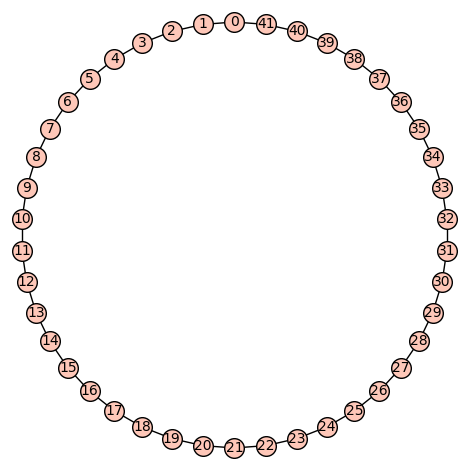

In [1]:
H=Graph({0:[1],1:[2],2:[3],3:[4],4:[5],5:[6],6:[7],7:[8],8:[9],9:[10],10:[11],11:[12],12:[13],13:[14],14:[15],15:[16],16:[17],17:[18],18:[19],19:[20],20:[21],21:[22],22:[23],23:[24],24:[25],25:[26],26:[27],27:[28],28:[29],29:[30],30:[31],31:[32],32:[33],33:[34],34:[35],35:[36],36:[37],37:[38],38:[39],39:[40],40:[41],41:[0] })
H.set_pos(H.layout_circular())
plot(H)

<a id="version"></a>
### 4) Différentes versions du programme

Pour trouver un générateur d'un groupe G de cardinal n, on parcourt les éléments de ce groupe. Pour chaque élément, on calcule ses puissances $g^k$ pour k entre 1 et n.  
Si aucun de ces calculs ne donne le neutre sauf le dernier, c'est que g est un générateur de G (en fait, $g^n$ vaut automatiquement 1 par le théorème de Lagrange).

Ce problème explique bien pourquoi le 1er programme crée était inutilisable avec de grands nombres, celui-ci génère énorment de calcul mais permet de récuperer les générateurs d'un groupe.

In [12]:
def OLDracine(p):
    racine = []
    phi = Euler(p)
    for n in range(1,p):
        resultat = []
        for x in range(1,p):
            resultat.append(pow(n,x,p))
        resultat = removeDoublons(resultat)
        if(phi == len(resultat)):
            racine.append(n)
    print(racine)
    return racine

In [22]:
import random

def racineP(p):  
    minval = random.randrange(400, p-1)
    print("minval : ")
    print(minval)
    if(minval%2 != 1):
        minval+= 1
    for n in range(minval,p-1,2): #Boucle
        if(MillerTest(n, 100000)):
            return n
    return 0

In [23]:
racineP(560992320034469143)

minval : 
388450502183009052


388450502183009111

**Il est inutile d'essayer le programme avec des valeurs inférieur à 400 car celle-ci pourrait créer des problèmes d'encryption**

<a id="fonctionnement_racine"></a>
### 5) Fonctionnement du programme  
###### Si par exemple nous rentrons la valeur de $36128112 $:  

+ Lors des 3 premières lignes de la fonction, le programme va vérifier si la valeur est supérieur à 400 afin de ne pas créer de problèmes par la suite, on stop le programme si la valeur est trop petite.  
  
+ Sur la 4e ligne de la fonction, nous générons un nombre aléatoire entre 400 et la valeur rentré p afin d'avoir un générateur aléatoire.  
  
+ Dans les lignes 5 et 6 de la fonction, nous regardons si la valeur random est un nombre impaire, si non, nous lui ajoutons 1, cela permet d'effectuer seulement une boucle sur deux à la prochaine ligne car n doit est premier est donc obligatoirement impaire.  
  
+ Ligne 7, notre boucle permet de créer une valeur n, commençant a la valeyr random trouvé et allant jusqu'a la valeur p en faisant des pas de 2.  
  
+ Ligne 8, nous regardons si le nombre n est premier en exécutant le test de Miller avec une précision de 100, si le nombre est 1er on le retourne.  
  
###### Ce programme permet donc de retourner un générateur tout juste supérieur a une valeur random généré et la valeur rentré en paramètre p

<a id="implementation"></a>
### 6) Implementation personnelle de la fonction $euler$_ $phi(n)$ 

<a id="definition_euler"></a>
#### a) Definition :
>L'indicatrice d'Euler est une fonction arithmétique de la théorie des nombres, qui à tout entier naturel n non nul associe le nombre d'entiers compris entre 1 et n (inclus) et premiers avec n.

La fonction indicatrice d'Euler (phi) est utilisée en arithmétique modulaire.  
Elle est notamment utilisée dans le Théorème d'Euler :
>Soit n est un entier supérieur à 1 et a un entier premier avec  n, alors $ a\cdotφ(n)≡1[n]$

Exemple :  
$n=7$, $a=3$ et $φ(7)=6$  
  
alors  
  
$3^6=729≡1[7]$

<a id="implementation_euler"></a>
#### b) Implémentation personnelle de la fonction euler_phi(n)

In [15]:
def Euler(n):
    if(n==1):
        return 1
    for d in range(2,n+1):
        if (n%(d*d))==0:
            return d*Euler(n/d)
        elif (n%d==0):
            return (d-1)*Euler(n/d)

In [16]:
Euler(42)

12

Cependant cela n'a pas été retenu en raison de temps et sageMath proposé une fonction plus efficace, la fonction **euler_phi(n)**

<a id="fonctionnement"></a>
## IV. Transformation d'un message par l'utilisation de grands nombres premiers

<a id="encryption"></a>
### 1) Première fonction : L'encryption

In [21]:
import random

#clé public
Z = IntegerRing()      #permet d'avoir une valeur qui est entière
p=Z(trouvNbPrem())     #nombre premier
g=racineP(p)

#clé privé
Cp=random.randrange(1, p-1)
print("Clé privé :", Cp)

y=pow(p,Cp,g)

print("Clé public : p,",p,", g,",g,", y,",y)

def encryption(p,g,y,m):
    r=random.randrange(pow(10,2),pow(10,18)) #La variable aléatoire
    u=pow(p,r,g)
    v=(m*pow(y,r))%g
    c=[u,v]    #couple de valeur qui vont servir à la décryption
    print("u : ",u)
    print("v : ",v)
    return c

Clé privé : 459485266465976725406566907701340003940477940417075271792658492
Clé public : p, 58894726360800634450343779631276145056840785162008176389013344223 , g, 44831169729954343432339501741391919025512693750781010250039153211 , y, 14347953909165243940919205842652499175047104267862024607884360360


+ La clé public est composée de nombres entiers ainsi que d'un élément, y, calculé à partir des deux premiers élément de la clé public public et de la clé privé. 
+ La clé privé quant à elle, est un nombre aléatoire compris entre 1 et $p-1$ que vous pouvez d'ailleurs voir ci-dessus, p étant le premier élément de la clé public. 
+ Ici, notre message, 53, est encrypté en 2 chiffres, u et v, qui pourront être décoder grâce à la clé privé du receveur.  
+ u et v sont tous les deux générés grâce à un paramètre aleatoire et à la clé public.

<a id="decryption"></a>
### 2) Deuxième fonction : La décryption

In [22]:
def decryption(c):
    m2=c[1]*pow(c[0],g-1-Cp)%g
    return m2

msg=53

print(decryption(encryption(p,g,y,msg))) #exemple

u :  37860093053591549278799846563492620766647345341031949906287196039
v :  23785532673882732432323663106759257183820896774977171327648045167
53


Vous pouvez voir ci-dessus les valeurs de u et v ainsi que le résultat de la décryption, 53, notre message d'origine.

<a id="messages"></a>
### 3) Les messages textuels

In [23]:
#enlève les prints inutiles de la version précédente
def encryption(p,g,y,m):
    r=random.randrange(pow(10,2),pow(10,18)) #La variable aléatoire
    u=pow(p,r,g)
    v=(m*pow(y,r))%g
    c=[u,v]    #couple de valeur qui vont servir à la décryption
    return c



msg='Bonjour Bépitiste'
print("message début :",msg,"\n")
listM = [ord(c) for c in msg]
print("Tab message en UTF8 :",listM,"\n")
listME = list()
listMD = list()

listMEAffich = list()

for val in listM :
    c = encryption(p,g,y,val)
    listME.append(c)
    listMEAffich.append(c[0])
    listMEAffich.append(c[1])
    
print("Tab message en UTF8 encrypté :",listME)
#print("Message encrypté :",''.join(chr(i) for i in listMEAffich))

for val2 in listME :
    listMD.append(decryption(val2))

print("\nMessage Decrypté naturellement :",''.join(chr(i) for i in listMD))

message début : Bonjour Bépitiste 

Tab message en UTF8 : [66, 111, 110, 106, 111, 117, 114, 32, 66, 233, 112, 105, 116, 105, 115, 116, 101] 

Tab message en UTF8 encrypté : [[19884545531866720289043063185734130589556236486913382701861493457, 43615849828419402976199472352789146126428292894391290940300919061], [4048212980614435867540966260316054826431562235814808284985844659, 28810904308659464010071148907732500541648996318095277563526704483], [14269114665580586528642963423676404610333116650634813145813281494, 32122163343087638372841556916803071934183992215439117229946171464], [1279388187541770877736892547721481701533365594007048096378886969, 7370628493300245325827450362036545193219578672592211007182601835], [7637356481973430287699909262725274173687760742496904100627709684, 26408388058162978818430043450032898201079834288638073803877339790], [27355742231042968369796038081451964794283915045602097958110713386, 5413817332415339237156679265121146683452378420237127487390404988], [1903097067076

##### Plusieurs choses se passe ici :  
+ Premièrement on sépare chaque charactère du message textuel pour le transformer en code UTF8 et le ranger dans une liste.  
  
+ Deuxièmement, on lance l'encryption de chaque élément de cette liste. Cela veut donc dire que chaque charactère est séparement encrypté en deux chiffres dans une liste. (cf. fonction d'encryption)  
  
*(on considère que le message a été envoyé)*  
  
+ Ensuite, on lance le décryptage de chaque élément de la liste encrypté.  
  
+ On continue en transformant le code UTF8 en charactère.  
  
+ On termine en rassemblant tous les charactères en un seul et unique message.